In [15]:
using DataFrames, Gadfly

In [32]:
function F(ϕ, n, k)
    res = 0
    if n / k >= ϕ
        res = 1
    end 
    res
end

F (generic function with 1 method)

In [33]:
function Cℓ(ℓ, ϕ, z, ∞ = 15)
    s₁ = 0.0
    for k = (ℓ + 1):∞
        for n = 0:ℓ
            s₁ = s₁ + binomial(k - 1, ℓ) * binomial(ℓ, n) * (-1)^(ℓ + n) * (k / z) * (z^k / factorial(k)) * exp(-z) * F(ϕ, n, k)
        end
    end
    s₁
end

Cℓ (generic function with 2 methods)

In [34]:
C₀(ϕ, z) = Cℓ(0, ϕ, z)
C₁(ϕ, z) = Cℓ(1, ϕ, z)
C₂(ϕ, z) = Cℓ(2, ϕ, z)

C₂ (generic function with 1 method)

In [40]:
function dis(ρ₀, ϕ, z)
    (C₁(ϕ,z) - 1)^2 - 4 * C₀(ϕ,z) * C₂(ϕ,z) + 2 * ρ₀ * (C₁(ϕ,z) - C₁(ϕ,z)^2 - 2 * C₂(ϕ,z) + 4 * C₀(ϕ,z) * C₂(ϕ,z))
end

dis (generic function with 1 method)

In [56]:
function bigb(ρ₀, ϕ, z)
    (1 - ρ₀) * C₁(ϕ,z) - 1
end

bigb (generic function with 1 method)

In [63]:
Z = [x for x = .1:.1:16]
Φ = [x for x = .001:.01:.3]
A = zeros(Int, length(Z), length(Φ))
za = Float64[]
ϕa = Float64[]
ca = Int[]
i = 1
for ϕ in Φ, z in sort(Z, rev = true)
    push!(za, z)
    push!(ϕa, ϕ)
    d = dis(10.0^(-2), ϕ, z)
    b = bigb(10.0^(-2), ϕ, z)
    if  d < 0 || b > 0
        A[i] = 1
        push!(ca, 1)
    else
        push!(ca, 0)
    end
    i = i + 1    
end

In [64]:
df = DataFrame(ϕ = ϕa, z = za, fill = ca);

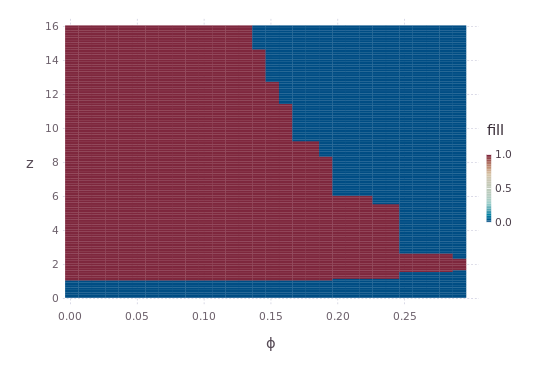

In [65]:
plot(df, x = "ϕ", y = "z", color = "fill", Geom.rectbin, 
Coord.cartesian(xmin=0, xmax=.3, ymin=0, ymax=16))